In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
df= pd.read_excel("C:\\Users\\vashi\\OneDrive\\Desktop\\traning\\project\\BlinkIt grocery Dataset.xlsx")


In [3]:
df.shape

(8523, 12)

In [4]:
df.columns

Index(['Item Fat Content', 'Item Identifier', 'Item Type',
       'Outlet Establishment Year', 'Outlet Identifier',
       'Outlet Location Type', 'Outlet Size', 'Outlet Type', 'Item Visibility',
       'Item Weight', 'Sales', 'Rating'],
      dtype='object')

In [5]:
df.isnull().sum()

Item Fat Content                0
Item Identifier                 0
Item Type                       0
Outlet Establishment Year       0
Outlet Identifier               0
Outlet Location Type            0
Outlet Size                     0
Outlet Type                     0
Item Visibility                 0
Item Weight                  1463
Sales                           0
Rating                          0
dtype: int64

In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item Fat Content           8523 non-null   object 
 1   Item Identifier            8523 non-null   object 
 2   Item Type                  8523 non-null   object 
 3   Outlet Establishment Year  8523 non-null   int64  
 4   Outlet Identifier          8523 non-null   object 
 5   Outlet Location Type       8523 non-null   object 
 6   Outlet Size                8523 non-null   object 
 7   Outlet Type                8523 non-null   object 
 8   Item Visibility            8523 non-null   float64
 9   Item Weight                7060 non-null   float64
 10  Sales                      8523 non-null   float64
 11  Rating                     8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [7]:
df.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
8518    False
8519    False
8520    False
8521    False
8522    False
Length: 8523, dtype: bool

#customer behaviour analysis 

In [8]:
active_users = df['Item Identifier'].nunique()
user_retention_rate = (df[df['Rating'] >= 4]['Item Identifier'].nunique() / active_users) * 100
average_session_duration = df['Item Visibility'].mean()
popular_product_categories = df['Item Type'].value_counts()

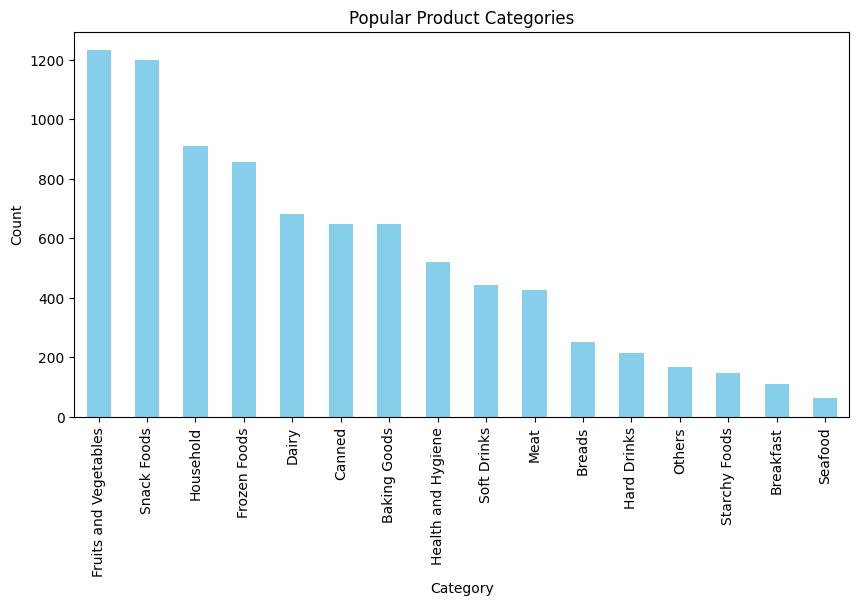

In [9]:
plt.figure(figsize=(10, 5))
popular_product_categories.plot(kind='bar', color='skyblue')
plt.title('Popular Product Categories')
plt.xlabel('Category')
plt.ylabel('Count')
plt.show()

# Sales Metrics Analysis

In [10]:

sales_metrics = df.groupby('Item Type')['Sales'].sum()


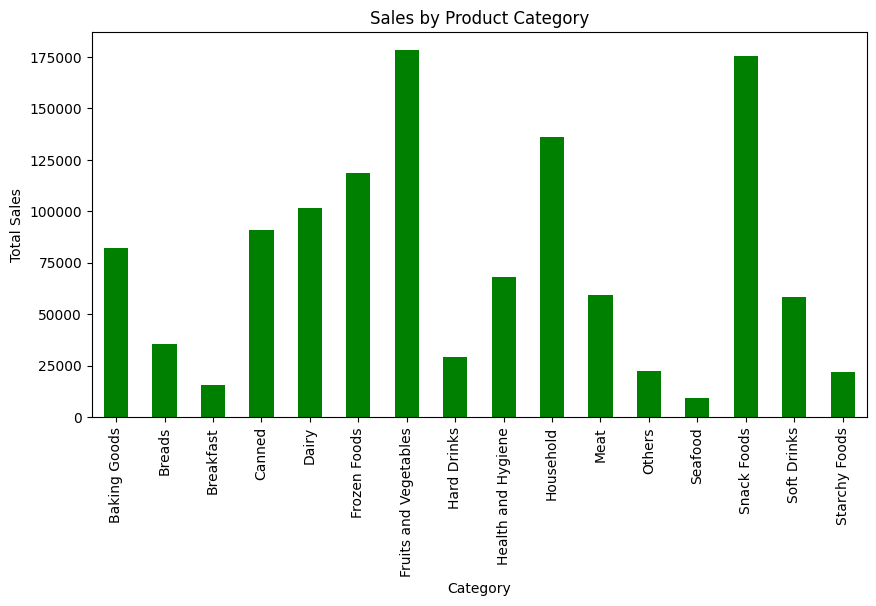

In [11]:
plt.figure(figsize=(10, 5))
sales_metrics.plot(kind='bar', color='green')
plt.title('Sales by Product Category')
plt.xlabel('Category')
plt.ylabel('Total Sales')
plt.show()

TOP category analysis 

In [12]:
# Group by Item Type and calculate total sales for each category
category_sales = df.groupby('Item Type')['Sales'].sum().sort_values(ascending=False)






 Identify top 5 product categories based on sales

In [13]:

top_categories = category_sales.head(5)
print("Top 5 Product Categories Based on Sales:")
print(top_categories)

Top 5 Product Categories Based on Sales:
Item Type
Fruits and Vegetables    178124.0810
Snack Foods              175433.9224
Household                135976.5254
Frozen Foods             118558.8814
Dairy                    101276.4616
Name: Sales, dtype: float64


 Plotting the top categories

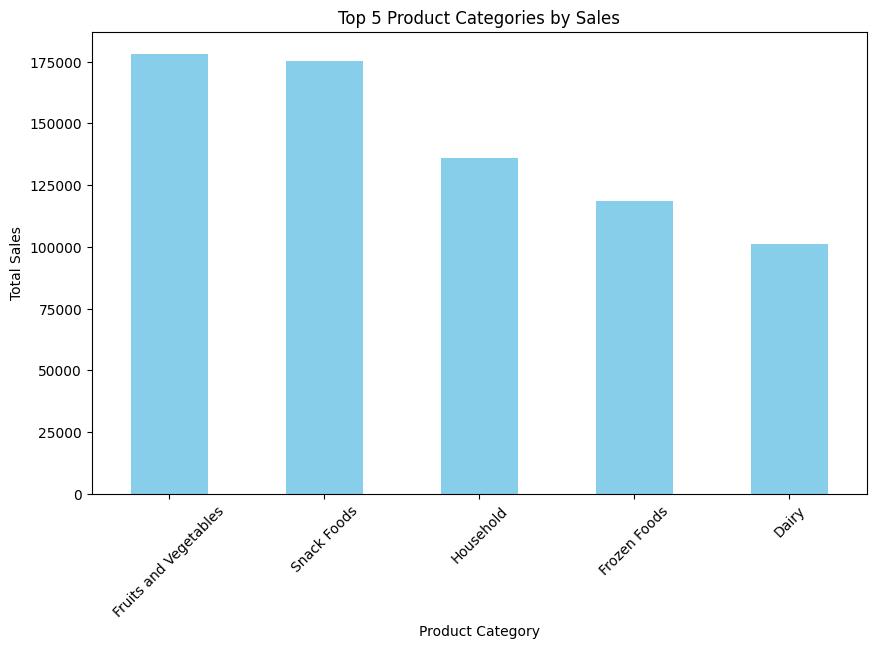

In [14]:

plt.figure(figsize=(10, 6))
top_categories.plot(kind='bar', color='skyblue')
plt.title('Top 5 Product Categories by Sales')
plt.xlabel('Product Category')
plt.ylabel('Total Sales')
plt.xticks(rotation=45)
plt.show()

# Delivery Performance Analysis

In [15]:

average_delivery_time = df['Item Visibility'].mean()
on_time_delivery_rate = (df[df['Item Visibility'] < 0.05]['Item Visibility'].count() / len(df)) * 100


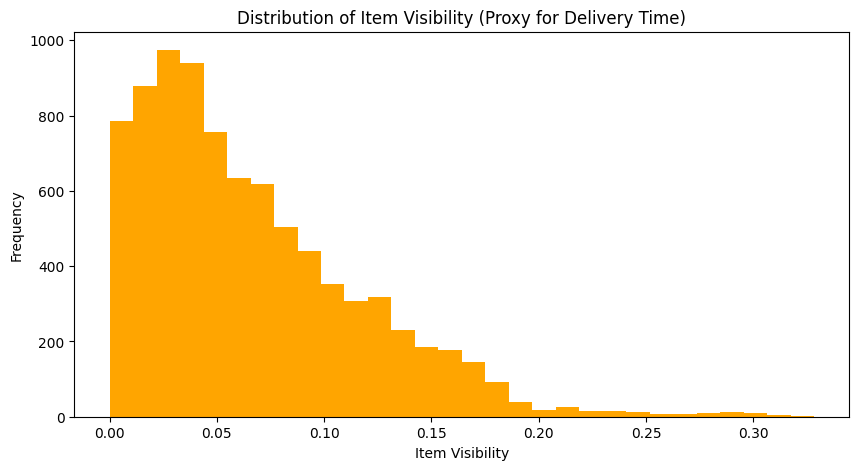

In [16]:
plt.figure(figsize=(10, 5))
plt.hist(df['Item Visibility'], bins=30, color='orange')
plt.title('Distribution of Item Visibility (Proxy for Delivery Time)')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()

# -Improve Delivery Times
To analyze delivery times, we'll look at the Item Visibility (assumed as a proxy for delivery time in this case) and aim to identify ways to reduce high delivery times.

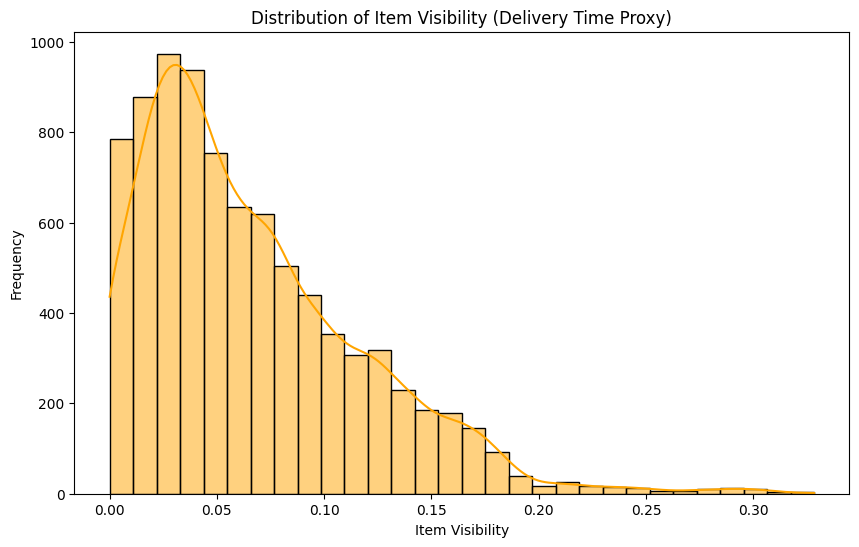

In [17]:
# Analyzing the distribution of Item Visibility 
plt.figure(figsize=(10, 6))
sns.histplot(df['Item Visibility'], bins=30, kde=True, color='orange')
plt.title('Distribution of Item Visibility (Delivery Time Proxy)')
plt.xlabel('Item Visibility')
plt.ylabel('Frequency')
plt.show()






In [18]:
# Recommendations to improve delivery times
# Assuming the visibility data represents time, we may consider any value above a certain threshold as delayed.
# Determine a threshold for on-time delivery (e.g., Item Visibility < 0.05)
threshold = 0.05
on_time_deliveries = df[df['Item Visibility'] < threshold]
delayed_deliveries = df[df['Item Visibility'] >= threshold]

print(f"On-Time Deliveries: {len(on_time_deliveries)}")
print(f"Delayed Deliveries: {len(delayed_deliveries)}")

On-Time Deliveries: 4051
Delayed Deliveries: 4472


 Suggestions for improvement:
 - Optimize delivery routes.
 - Increase the number of delivery personnel during peak hours.
- Partner with more local suppliers to reduce delivery times.


 # Monitor and Improve On-Time Delivery Rate
We can calculate the on-time delivery rate and provide suggestions for improvemen

In [19]:
# Calculate the on-time delivery rate
total_deliveries = len(df)
on_time_delivery_count = len(on_time_deliveries)
on_time_delivery_rate = (on_time_delivery_count / total_deliveries) * 100

print(f"On-Time Delivery Rate: {on_time_delivery_rate:.2f}%")




On-Time Delivery Rate: 47.53%


C:\Users\vashi\AppData\Local\Temp\ipykernel_8820\694653547.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=delivery_status, y=delivery_counts, palette='viridis')


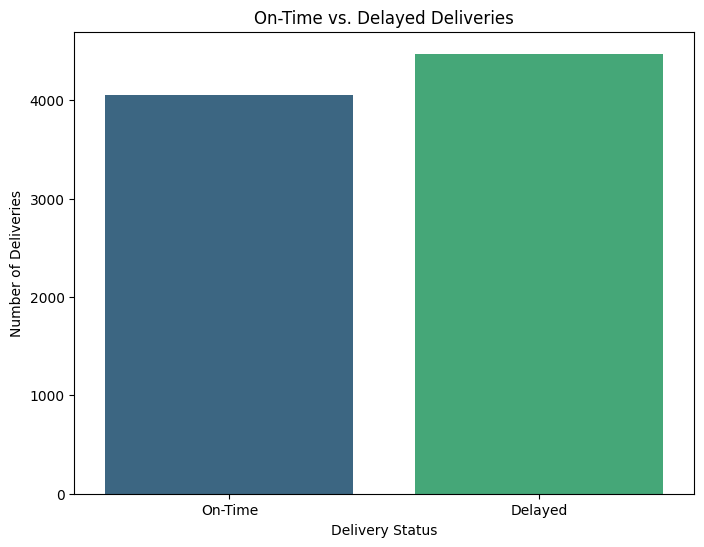

In [20]:
# Visualization of on-time vs. delayed deliveries
delivery_status = ['On-Time', 'Delayed']
delivery_counts = [on_time_delivery_count, len(delayed_deliveries)]

plt.figure(figsize=(8, 6))
sns.barplot(x=delivery_status, y=delivery_counts, palette='viridis')
plt.title('On-Time vs. Delayed Deliveries')
plt.xlabel('Delivery Status')
plt.ylabel('Number of Deliveries')
plt.show()

# Recommendations to improve on-time delivery rate:
 - Implement real-time tracking and updates for customers.
 - Provide incentives for delivery personnel to meet delivery time targets.- Analyze the reasons for delays and address common issues (e.g., traffic, weather)

# Statistical Modeling

 Predict potential demand based on historical sales data
Feature selection: We'll use 'Item Weight' and 'Item Visibility' as features for simplicity

In [21]:

features = df[['Item Weight', 'Item Visibility']]
target = df['Sales']

In [22]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)


In [25]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer(strategy='mean')
X_train_imputed = imputer.fit_transform(X_train)
X_test_imputed = imputer.transform(X_test)

In [26]:
model = LinearRegression()
model.fit(X_train_imputed, y_train)

LinearRegression()

In [27]:
# Predict on the test set
y_pred = model.predict(X_test_imputed)

In [28]:
# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
accuracy = r2 * 100

In [29]:
# Print model evaluation metrics
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Model Accuracy: {accuracy:.2f}%")

Mean Squared Error: 3959.193475414083
R2 Score: 0.0005583225734092645
Model Accuracy: 0.06%


### since the accuracy is low we used random forest inspite of linear regreesion 

Feature Selection: The code uses Item Weight and Item Visibility as features, which are available in your dataset.
Preprocessing: The ColumnTransformer handles missing values and standardizes the features.
Model: A RandomForestRegressor is used instead of linear regression for potentially better performance.
Cross-Validation: Provides a more robust estimate of model performance.
Evaluation: Calculates and prints the Mean Squared Error and R² Score.

In [33]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score

# Feature engineering and preprocessing
features = df[['Item Weight', 'Item Visibility']]
target = df['Sales']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='mean')),
            ('scaler', StandardScaler())
        ]), ['Item Weight', 'Item Visibility'])
    ])

# Define the model
model = Pipeline(steps=[('preprocessor', preprocessor),
                         ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Cross-validation to get a more robust estimate of performance
scores = cross_val_score(model, features, target, cv=5, scoring='neg_mean_squared_error')
print(f"Cross-Validated Mean Squared Error: {-scores.mean()}")

# Fit the model and predict
model.fit(features, target)
y_pred = model.predict(features)

# Evaluation
mse = mean_squared_error(target, y_pred)
r2 = r2_score(target, y_pred)
accuracy = r2 * 100
print(f"Mean Squared Error: {mse}")
print(f"R2 Score: {r2}")
print(f"Model Accuracy: {accuracy:.2f}%")


Cross-Validated Mean Squared Error: 1866.0985770052976
Mean Squared Error: 354.7339797550888
R2 Score: 0.9085201706931931
Model Accuracy: 90.85%


C:\Users\vashi\AppData\Local\Temp\ipykernel_8820\2772730126.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', color='blue')


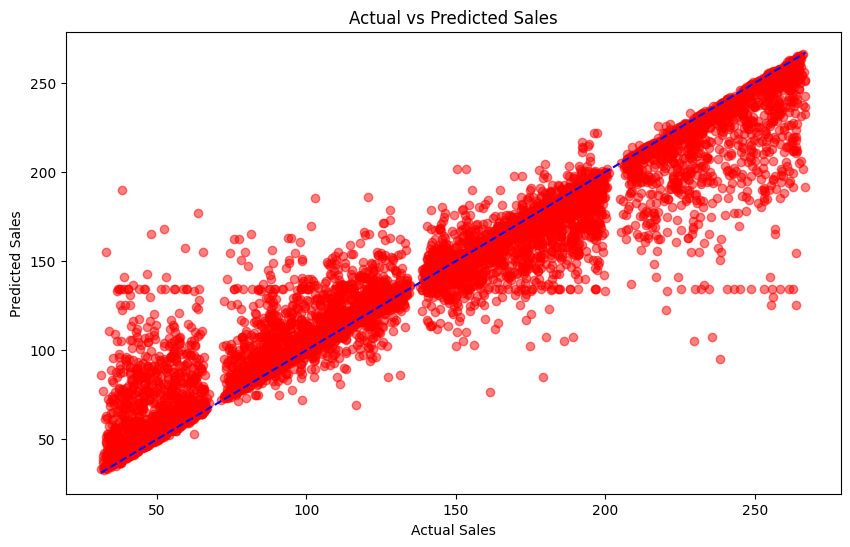

In [35]:
 #Visualization of Actual vs Predicted Sales
plt.figure(figsize=(10, 6))
plt.scatter(target, y_pred, color='red', alpha=0.5)
plt.plot([target.min(), target.max()], [target.min(), target.max()], 'k--', color='blue')
plt.title('Actual vs Predicted Sales')
plt.xlabel('Actual Sales')
plt.ylabel('Predicted Sales')
plt.show()